In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO2_247.JPG
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO4_242.JPG
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO2_124.JPG
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO3_037.jpg
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO1_153.JPG
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO1_147.JPG
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO4_147.JPG
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO2_148.JPG
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO1_272.JPG
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO3_002.jpg
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO4_041.jpg
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO4_179.JPG
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO2_010.jpg
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO2_184.JPG
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO5_39.JPG
/kaggle/input/rice-leaf-disease-image/Tungro/TUNGRO5_13.jpg
/kaggle/input/rice-leaf-di

In [37]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
source_path = '/kaggle/input/rice-leaf-disease-image'
source_path_Bacterialblight = os.path.join(source_path, 'Bacterialblight')
source_path_Blast = os.path.join(source_path, 'Blast')
source_path_Brownspot = os.path.join(source_path, 'Brownspot')
source_path_Tungro = os.path.join(source_path, 'Tungro')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_Bacterialblight))} images of Bacterialblight.")
print(f"There are {len(os.listdir(source_path_Blast))} images of Blast.")
print(f"There are {len(os.listdir(source_path_Brownspot))} images of Brownspot.")
print(f"There are {len(os.listdir(source_path_Tungro))} images of Tungro.")

There are 1584 images of Bacterialblight.
There are 1440 images of Blast.
There are 1600 images of Brownspot.
There are 1308 images of Tungro.


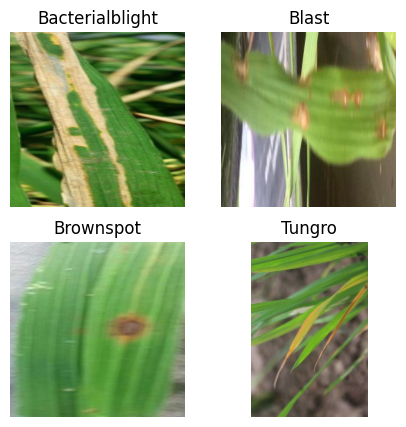

In [40]:
# Fungsi untuk menampilkan satu gambar dari setiap kelas
def show_sample_image(image_dir, class_name):
    image_path = os.path.join(image_dir, os.listdir(image_dir)[0])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

# Menampilkan satu gambar dari setiap kelas
plt.figure(figsize=(5, 5))

plt.subplot(2, 2, 1)
show_sample_image(source_path_Bacterialblight, 'Bacterialblight')

plt.subplot(2, 2, 2)
show_sample_image(source_path_Blast, 'Blast')

plt.subplot(2, 2, 3)
show_sample_image(source_path_Brownspot, 'Brownspot')

plt.subplot(2, 2, 4)
show_sample_image(source_path_Tungro, 'Tungro')

plt.show()

In [5]:
root_dir = '/kaggle/working/RLDI'
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
    os.makedirs(os.path.join(root_path, 'training/Bacterialblight'))
    os.makedirs(os.path.join(root_path, 'training/Blast'))
    os.makedirs(os.path.join(root_path, 'training/Brownspot'))
    os.makedirs(os.path.join(root_path, 'training/Tungro'))
    os.makedirs(os.path.join(root_path, 'validation/Bacterialblight'))
    os.makedirs(os.path.join(root_path, 'validation/Blast'))
    os.makedirs(os.path.join(root_path, 'validation/Brownspot'))
    os.makedirs(os.path.join(root_path, 'validation/Tungro'))

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [6]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/kaggle/working/RLDI/training
/kaggle/working/RLDI/validation
/kaggle/working/RLDI/training/Blast
/kaggle/working/RLDI/training/Tungro
/kaggle/working/RLDI/training/Brownspot
/kaggle/working/RLDI/training/Bacterialblight
/kaggle/working/RLDI/validation/Blast
/kaggle/working/RLDI/validation/Tungro
/kaggle/working/RLDI/validation/Brownspot
/kaggle/working/RLDI/validation/Bacterialblight


In [7]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

    source_files = []

    for image_name in os.listdir(SOURCE_DIR):
        image_path = os.path.join(SOURCE_DIR, image_name)

        if not os.path.getsize(image_path):
            print(f"{image_name} is zero length, so ignoring.")
            continue

        source_files.append(image_name)

    num_images = len(source_files)
    num_training = int(num_images * SPLIT_SIZE)
    list_files = random.sample(source_files, num_images)

    training_images = list_files[:num_training]
    validation_images = list_files[num_training:]

    for training_image in training_images:
        shutil.copyfile(os.path.join(SOURCE_DIR, training_image),
                        os.path.join(TRAINING_DIR, training_image))

    for validation_image in validation_images:
        shutil.copyfile(os.path.join(SOURCE_DIR, validation_image),
                        os.path.join(VALIDATION_DIR, validation_image))

In [14]:
Bacterialblight_SOURCE_DIR = "/kaggle/input/rice-leaf-disease-image/Bacterialblight"
Blast_SOURCE_DIR = "/kaggle/input/rice-leaf-disease-image/Blast"
Brownspot_SOURCE_DIR = "/kaggle/input/rice-leaf-disease-image/Brownspot"
Tungro_SOURCE_DIR = "/kaggle/input/rice-leaf-disease-image/Tungro"

TRAINING_DIR = "/kaggle/working/RLDI/training"
VALIDATION_DIR = "/kaggle/working/RLDI/validation"

TRAINING_Bacterialblight_DIR = os.path.join(TRAINING_DIR, "Bacterialblight/")
VALIDATION_Bacterialblight_DIR = os.path.join(VALIDATION_DIR, "Bacterialblight/")

TRAINING_Blast_DIR = os.path.join(TRAINING_DIR, "Blast/")
VALIDATION_Blast_DIR = os.path.join(VALIDATION_DIR, "Blast/")

TRAINING_Brownspot_DIR = os.path.join(TRAINING_DIR, "Brownspot/")
VALIDATION_Brownspot_DIR = os.path.join(VALIDATION_DIR, "Brownspot/")


TRAINING_Tungro_DIR = os.path.join(TRAINING_DIR, "Tungro/")
VALIDATION_Tungro_DIR = os.path.join(VALIDATION_DIR, "Tungro/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_Bacterialblight_DIR)) > 0:
  for file in os.scandir(TRAINING_Bacterialblight_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_Blast_DIR)) > 0:
  for file in os.scandir(TRAINING_Blast_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_Brownspot_DIR)) > 0:
  for file in os.scandir(TRAINING_Brownspot_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_Tungro_DIR)) > 0:
  for file in os.scandir(TRAINING_Tungro_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_Bacterialblight_DIR)) > 0:
  for file in os.scandir(VALIDATION_Bacterialblight_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_Blast_DIR)) > 0:
  for file in os.scandir(VALIDATION_Blast_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_Blast_DIR)) > 0:
  for file in os.scandir(VALIDATION_Blast_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_Tungro_DIR)) > 0:
  for file in os.scandir(VALIDATION_Tungro_DIR):
    os.remove(file.path)

split_size = .85

split_data(Bacterialblight_SOURCE_DIR, TRAINING_Bacterialblight_DIR, VALIDATION_Bacterialblight_DIR, split_size)
split_data(Blast_SOURCE_DIR , TRAINING_Blast_DIR, VALIDATION_Blast_DIR, split_size)
split_data(Brownspot_SOURCE_DIR,TRAINING_Brownspot_DIR, VALIDATION_Brownspot_DIR, split_size)
split_data(Tungro_SOURCE_DIR, TRAINING_Tungro_DIR,VALIDATION_Tungro_DIR, split_size)

print(f"\n\nOriginal Bacterialblight's directory has {len(os.listdir(Bacterialblight_SOURCE_DIR))} images")
print(f"Original Blast's directory has {len(os.listdir(Blast_SOURCE_DIR))} images")
print(f"Original Brownspot's directory has {len(os.listdir(Brownspot_SOURCE_DIR))} images")
print(f"Original Tungro's directory has {len(os.listdir(Tungro_SOURCE_DIR))} images")

print(f"\nThere are {len(os.listdir(TRAINING_Bacterialblight_DIR))} images of Bacterialblight for training")
print(f"There are {len(os.listdir(TRAINING_Blast_DIR))} images of Blasts for training")
print(f"There are {len(os.listdir(TRAINING_Brownspot_DIR))} images of Brownspot for training")
print(f"There are {len(os.listdir(TRAINING_Tungro_DIR))} images of Tungro for training")

print(f"\nThere are {len(os.listdir(VALIDATION_Bacterialblight_DIR))} images of Bacterialblight for validation")
print(f"There are {len(os.listdir(VALIDATION_Blast_DIR))} images of Blast for validation")
print(f"There are {len(os.listdir(VALIDATION_Brownspot_DIR))} images of Brownspot for validation")
print(f"There are {len(os.listdir(VALIDATION_Tungro_DIR))} images of Tungro for validation")



Original Bacterialblight's directory has 1584 images
Original Blast's directory has 1440 images
Original Brownspot's directory has 1600 images
Original Tungro's directory has 1308 images

There are 1346 images of Bacterialblight for training
There are 1224 images of Blasts for training
There are 1360 images of Brownspot for training
There are 1111 images of Tungro for training

There are 238 images of Bacterialblight for validation
There are 216 images of Blast for validation
There are 503 images of Brownspot for validation
There are 197 images of Tungro for validation


In [15]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1/255)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale=1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))

  return train_generator, validation_generator

In [16]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 5041 images belonging to 4 classes.
Found 1154 images belonging to 4 classes.


In [23]:
import tensorflow as tf

def create_model():
    model = tf.keras.models.Sequential([
#         tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
#         tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Dropout layer

        tf.keras.layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [45]:
# Periksa input shape
input_shape = model.input_shape[1:]  # Mengabaikan dimensi batch
print("Input shape model:", input_shape)

Input shape model: (150, 150, 3)


In [24]:
model = create_model()
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator,
                    # callbacks=[early_stopping]
                    )

Epoch 1/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 98s 609ms/step - accuracy: 0.4330 - loss: 1.6455 - val_accuracy: 0.7886 - val_loss: 0.6548
Epoch 2/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 96s 605ms/step - accuracy: 0.6818 - loss: 0.8222 - val_accuracy: 0.8588 - val_loss: 0.4553
Epoch 3/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 97s 609ms/step - accuracy: 0.8100 - loss: 0.5313 - val_accuracy: 0.9099 - val_loss: 0.2512
Epoch 4/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 142s 610ms/step - accuracy: 0.8494 - loss: 0.4141 - val_accuracy: 0.8423 - val_loss: 0.3619
Epoch 5/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 97s 612ms/step - accuracy: 0.8752 - loss: 0.3295 - val_accuracy: 0.9697 - val_loss: 0.1187
Epoch 6/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 97s 613ms/step - accuracy: 0.9170 - loss: 0.2233 - val_accuracy: 0.9627 - val_loss: 0.1116
Epoch 7/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 98s 615ms/step - accuracy: 0.9324 - loss: 0.1951 - val_accuracy: 0.9697 - val_loss: 0.0909
Epoch 8/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 99s 622ms/step - accuracy: 0.9459 - loss: 

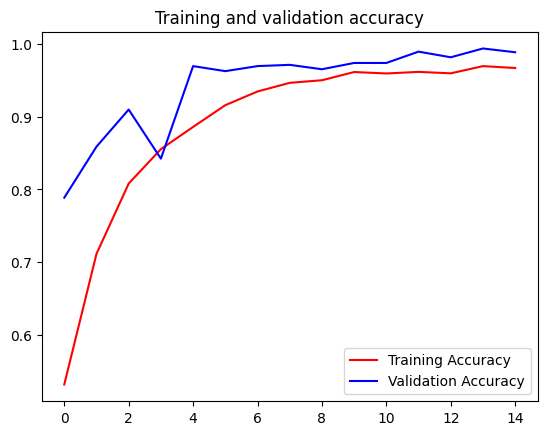

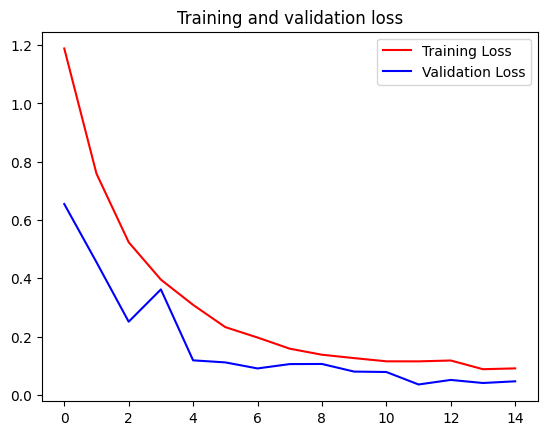

In [25]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [41]:
import pickle

# Simpan history pelatihan
with open('/kaggle/working/history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Simpan model
model.save('/kaggle/working/my_model.h5')

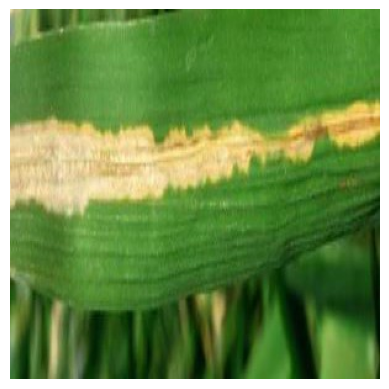

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediksi: Bacterialblight


In [58]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Memuat model yang telah dilatih
model = tf.keras.models.load_model('/kaggle/working/my_model.h5')

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_image(model, img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    return prediction

# Path gambar yang diunggah ke Kaggle
uploaded_image_path = '/kaggle/working/RLDI/validation/Bacterialblight/BACTERIALBLIGHT1_036.jpg'  # Ganti dengan path gambar yang diunggah

# Menampilkan gambar
img = image.load_img(uploaded_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Melakukan prediksi
prediction = predict_image(model, uploaded_image_path)

# Misalkan model Anda adalah klasifikasi kategorikal dengan 4 kelas
class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']
predicted_class = np.argmax(prediction[0])
print(f"Prediksi: {class_names[predicted_class]}")
